## 12-2 파이썬으로 그래프를 그린다는건?

준비물
___
$ pip install matplotlib 
$ pip install seaborn

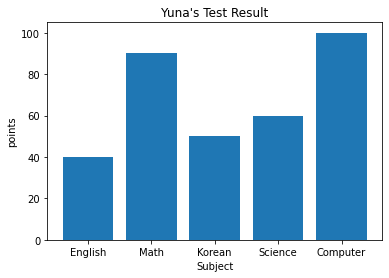

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# 그래프 데이터
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel("Subject")
plt.ylabel("points")
plt.title("Yuna's Test Result")

# 보여주기
plt.savefig('./barplot.png') # 그래프를 이미지로 출력
plt.show()

- %matplotlib inline 은 Ipython에서 사용하는 매직 메소드 Rich output에 대한 표현 방식
- 그림, 소리, 애니메이션 과 같은 결과물을 Rich output 이라고 함

참고사이트 https://studymake.tistory.com/601
___
### 2. 축 그리기
___
그래프를 그리는 순서는 우선 하나의 그림(figure)객체를 만들고 그 안에 하위 그래프(subplot)을 추가합니다.


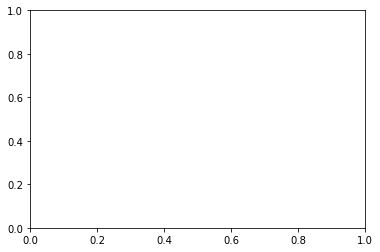

In [2]:
# 축 그리기 (하나의 그림 객체를 만드는 코드)
fig = plt.figure() 
ax1 = fig.add_subplot(1,1,1)

만약 fig = plt.figure() 만 입력한다면

In [3]:
fig = plt.figure() 

<Figure size 432x288 with 0 Axes>

축이 없어 그려지는 것이 없지만 figure 객체가 생성되었습니다.   
   
figure()라는 객체는 도화지(그래프)입니다. 이 figure()객체에 add_subplot 메소드를 이용해 축을 그린다.   
figsize인자값을 주어 그래프의 크기를 정할 수 있음

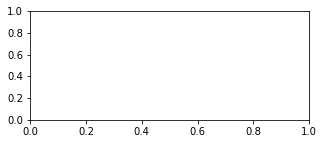

In [4]:
fig = plt.figure(figsize=(5,2))
ax1 = fig.add_subplot(1,1,1)

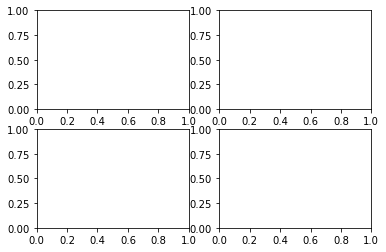

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

## 3. 그래프 그리기
___
bar() 메소드를 이용해 막대그래프를 그릅니다. 그리고 인자에 위에서 정의한 데이터들을 x,y순으로 넣어 줍니다.

Text(0.5, 1.0, "Yuna's Test Result")

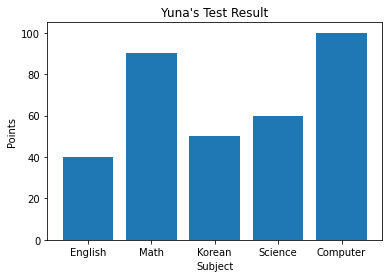

In [7]:
# 그래프 데이터
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Yuna's Test Result")

## 12-4. 간단한 그래프 그리기(2) 선 그래프 그려보기

matplotlib을 이용해 선(line) 그래프를 그려보겠습니다.

__1. 데이터 정의__
___
모듈 import 하고 그래프로 그릴 데이터를 정의

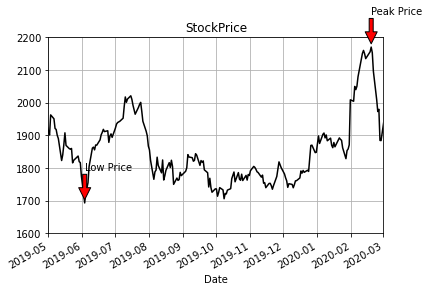

In [21]:
from datetime import datetime
import pandas as pd
import os

# 그래프 데이터

csv_path = os.getenv("HOME") + "/workplace/sba_project/aiffel/data/AMZN.csv"
data = pd.read_csv(csv_path, index_col =0, parse_dates=True)
price = data['Close']

# 축 그리기 및 좌표축 설정

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1600, 2200])
plt.xlim(['2019-05-01','2020-03-01'])

# 주석달기
important_data = [(datetime(2019, 6, 3), "Low Price"), (datetime(2020, 2, 19), "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d) +10),
                xytext=(d,price.asof(d)+100),
                arrowprops=dict(facecolor='red'))
    
# 그리드, 타이틀 달기
plt.grid()
ax.set_title("StockPrice")

# 보여주기
plt.show()

__Pandas Series 데이터 활용__
   
Pandas의 Series는 선 그래프를 그리기에 최적의 자료구조를 갖추고 있습니다.  
위 예시코드는 price = data['Close']가 바로 pandas의 series입니다.   
price.plot(ax=ax,  style = 'black') 에서 pandas의 plot을 사용하면서, matplotlib에서 정의한 subplot 공간 ax 를 사용한 것을 알 수 있습니다.   
   
__좌표축 설정__    
plt.xlim(), plt.ylim()을 통해 x, y 좌표축의 적당한 범위를 설정해 줄 수 있습니다.   
   
__주석__   
그래프 안에 추가적으로 글자나 화살표 등 주석을 그릴 때는 annotate() 메소드를 이용합니다.   
주석달기는 그래프 그리기의 고급 기법입니다.   
   
__그리드__   
grid() 메소드를 이용하면 그리드(격자눈금)를 추가 할 수 있어요
  

## 12-5 간닪나 그래프 그리기(3) plot 사용법 상세
___
위에서 figure() 객체를 생성하고 add_subplot() 으로 서브 플롯을 생성하며 plot을 그린다고 했습니다.   
이 2가지 과정을 생략할 수 도 있는데요. plt.plot() 명령으로 그래프를 그리면 matplotlib은 가장 최근의 figure객ㅊ와 그 서브플롯을 그립니다.   
서브 플롯이 없다면, 새로 하나 생성합니다.   
   
plt.plot() 의 인자로 x데이터, y데이터, 마커옵션, 색상 등의 인자를 이용할 수 있고

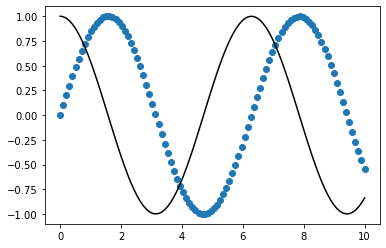

In [22]:
import numpy as np
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x), '-', color='black')
plt.show()

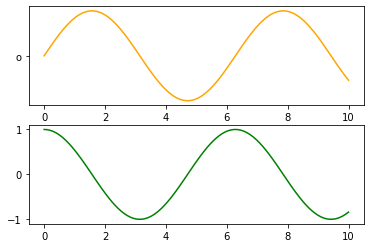

In [16]:
x = np.linspace(0,10,100)

plt.subplot(2,1,1)
plt.plot(x, np.sin(x),'orange','o')

plt.subplot(2,1,2)
plt.plot(x, np.cos(x), 'green')

## linestyle, marker 옵션
___
라인 스타일은 Plot()의 인자로 들어가는데 아래와 같이 다양한 방법으로 표기 할 수 있습니다.

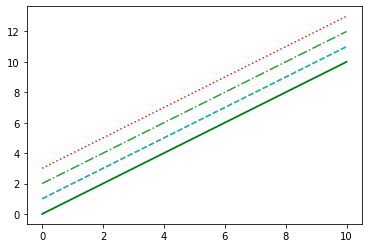

In [4]:
x = np.linspace(0, 10, 100)

plt.plot(x, x+0, linestyle = 'solid')
plt.plot(x, x+1, linestyle = 'dashed')
plt.plot(x, x+2, linestyle = 'dashdot')
plt.plot(x, x+3, linestyle = 'dotted')
plt.plot(x, x+0, 'g')
plt.plot(x, x+1, '--c')

### pandas로 그래프 그리기
___
Pandas도 plot() 메소드를 통해 여러 가지 그래프를 그릴 수 있습니다.   
   
matplotlib과 연계해 사용   
   
   pandas.plot 메서드 인자   
- label: 그래프의 범례 이름
- ax: 그래프를 그릴 matplotlib의 서브플롯 객체
- style: matplotlib에 전달할 'ko--' 같은 스타일의 문자열
- alpha: 투명도(0, -1)
- kind: 그래프의 종류: line, bar, barh, kde
- logy: Y축에 대한 로그스케일
- use_index: 객체의 색인을 눈금 이름으로 사용할지의 여부
- rot: 눈금 이름을 로테이션(0~360)
- xticks, yticks: x축, y축으로 사용할 값
- xlim, ylim: x축, y축 한계
- grid: 축의 그리그 표시 할지 여부

### pandas의 data가 DataFrame일때 plot 메소드 인자
- subplots: 각 DataFrame의 칼럼을 독립된 서브플롯에 그린다.
- sharex: subplots=True 면 같은 X축을 공유하고 눈금과 한계를 연결한다.
- sharey: subplots=True 면 같은 y축을 공유한다.
- figsize: 그래프의 크기, 튜플로 지정
- title: 그래프의 제목을 문자열로 지정
- sort_columns: 칼럼을 알파벳 순서로 그린다.

<AxesSubplot:>

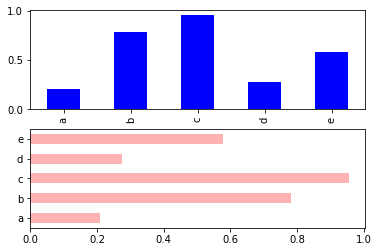

In [15]:
import pandas as pd

fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(5), index=list('abcde'))
data.plot(kind='bar', ax=axes[0], color='blue', alpha=1)
data.plot(kind='barh', ax=axes[1], color='red', alpha=0.3)

<AxesSubplot:>

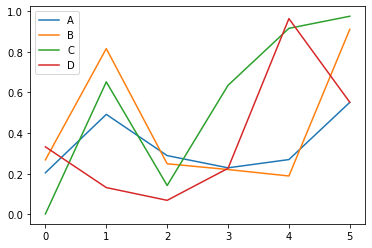

In [17]:
df = pd.DataFrame(np.random.rand(6,4), columns=pd.Index(['A','B','C','D']))
df.plot(kind='line')

## 12-6 간단한 그래프 그리기

__6.정리__
___
1. fig = plt.figure(): figure 객체를 선언해 '도화지를 펼쳐' 줍니다.
2. ax1 = fig.add_subplot(1,1,1): 축을 그립니다.
3. ax1.bar(x,y) 축안에 어떤그래프를 그릴지 메소드를 선택한 다음, 인자로 데이터를 넣어줍니다.
4. 그래프 타이틀 축의 레이블 등을 plt의 여러 메소드 grid, xlabel, ylabel을 이용해서 추가
5. plt.savefig 메소드를 이용해 저장

## 12-7 그래프 4대 천왕 (1) 데이터 준비

__데이터 준비__
___
1) 데이터 불러오기

   Seaborn의 load_dataset() 메소드를 이용하면 API를 통해 손쉽게 유명한 예제 데이터를 다운로드

In [1]:
import pandas as pd
import seaborn as sns

tips = sns.load_dataset("tips")

In [2]:
df = pd.DataFrame(tips)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.shape

(244, 7)

In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [10]:
print(df['sex'].value_counts())
print("===================")

print(df['time'].value_counts())
print("===================")

print(df['smoker'].value_counts())
print("===================")

print(df['day'].value_counts())
print("===================")

print(df['size'].value_counts())

Male      157
Female     87
Name: sex, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64


## 12-8 그래프 4대 천왕(2) 범주형 데이터

__범주형 데이터__
___
__1) 막대 그래프__
    
* pandas와 matplotlib을 활용한 방법

In [11]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
grouped = df['tip'].groupby(df['sex'])

In [13]:
grouped.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [14]:

grouped.size()

sex
Male      157
Female     87
Name: tip, dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs)>

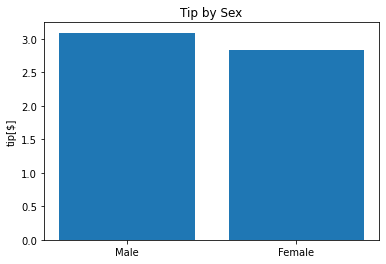

In [18]:
import matplotlib.pyplot as plt
import numpy as np
sex = dict(grouped.mean())
x= list(sex.keys())
y = list(sex.values())

plt.bar(x,y)
plt.ylabel('tip[$]')
plt.title('Tip by Sex')
plt.legend

<AxesSubplot:xlabel='sex', ylabel='tip'>

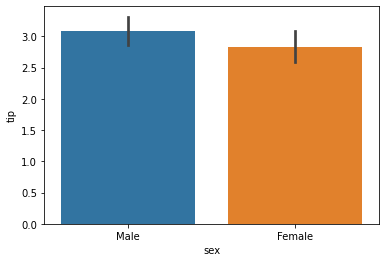

In [19]:
sns.barplot(data=df, x='sex', y='tip')

Text(0.5, 1.0, 'Tip by sex')

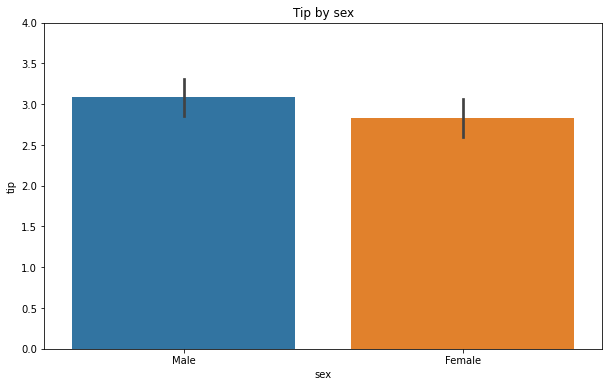

In [23]:
plt.figure(figsize = (10,6))
sns.barplot(data=df, x='sex', y='tip')
plt.ylim(0,4)
plt.title('Tip by sex')

Text(0.5, 1.0, 'Tip by day')

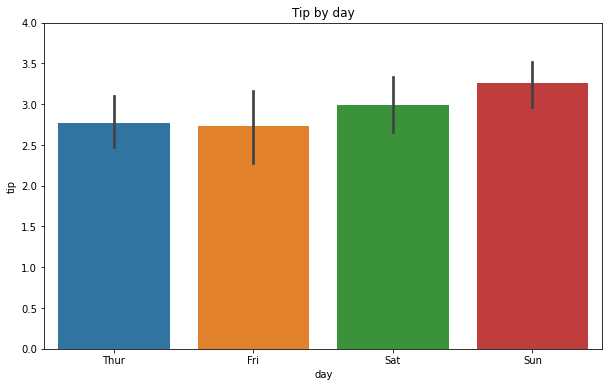

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day', y='tip')
plt.ylim(0,4)
plt.title('Tip by day')

<AxesSubplot:xlabel='day', ylabel='tip'>

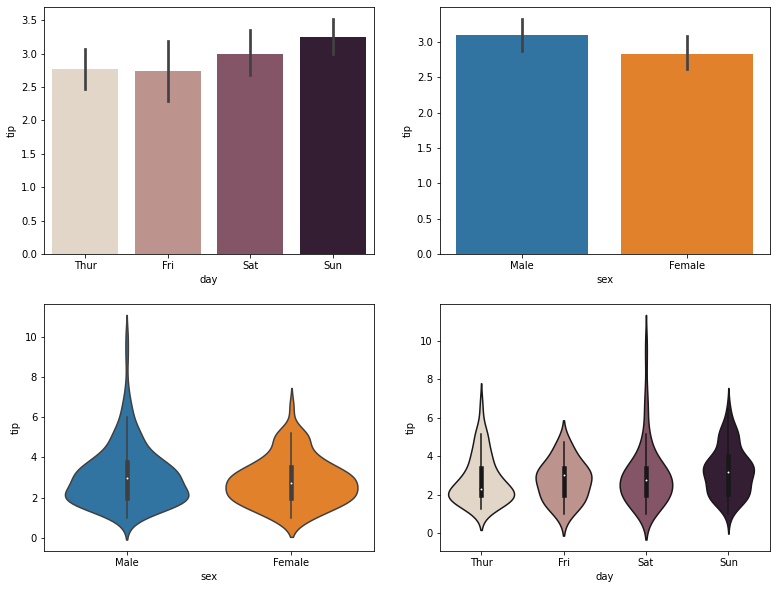

In [27]:
fig = plt.figure(figsize=(13,10))
ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x='day', y='tip', palette="ch:.25")

ax2 = fig.add_subplot(2,2,2)
sns.barplot(data=df, x='sex', y='tip')

ax3 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x='sex', y='tip')

ax4 = fig.add_subplot(2,2,4)
sns.violinplot(data=df, x='day', y='tip', palette="ch:.25")

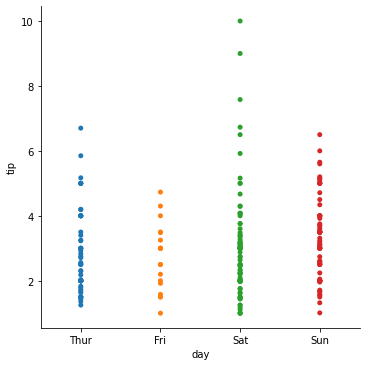

In [28]:
sns.catplot(x='day', y='tip', jitter=False, data=tips)

## 12-9 그래프 4대 천왕 수치형 데이터
__수치형 데이터__
___
수치형 데이터를 나타내는데 가장 좋은 그래프는 산점도 혹은 선그래프입니다.

__2)산점도(Scatter plot)__

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

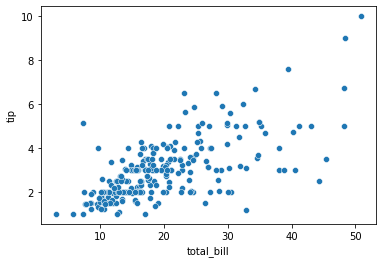

In [29]:
sns.scatterplot(data=df, x='total_bill', y='tip', palette="ch:r=-.2, d=.3_r")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

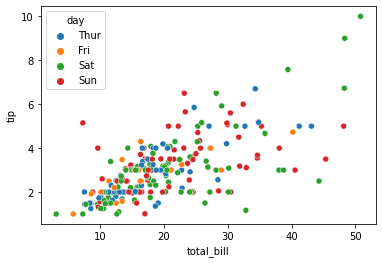

In [30]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='day')

__3) 선 그래프(line graph)__

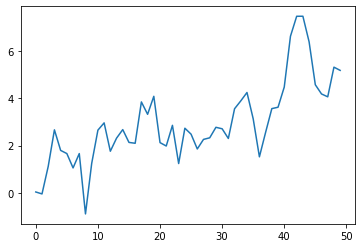

In [32]:
plt.plot(np.random.randn(50).cumsum())

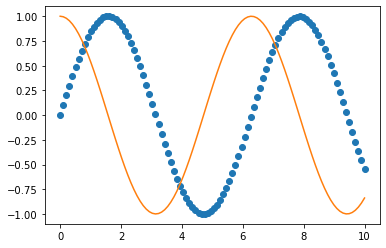

In [33]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x),'o')
plt.plot(x, np.cos(x))
plt.show()

/home/jaejin/anaconda3/envs/aiffel/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/jaejin/anaconda3/envs/aiffel/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

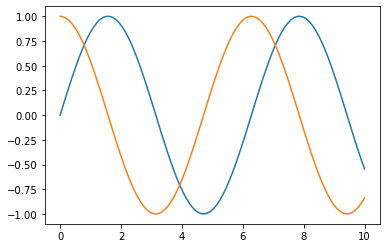

In [37]:
sns.lineplot(x, np.sin(x))
sns.lineplot(x, np.cos(x))

### 4) 히스토그램

- 가로축
    - 계급: 변수의 구간, bin(or bucket)
- 세로축
    - 도수: 빈도수, frequency
- 전체총량: n

다음과 같은 데이터의 히스토그램을 만들어보자
- x1과 x2의 평균은 100,130 입니다.
- 도수를 50개의 구간으로 표시하며, 확률 밀도가 아닌 빈도로 표기합니다.

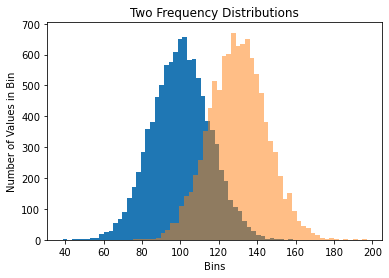

In [38]:
# 그래프 데이터
mu1, mu2, sigma = 100, 130, 15
x1 = mu1 + sigma*np.random.randn(10000)
x2 = mu2 + sigma*np.random.randn(10000)

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
patches = ax1.hist(x1, bins=50, density=False)
patches = ax1.hist(x2, bins=50, density=False, alpha=0.5)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

# 라벨, 타이틀 달기
plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
ax1.set_title('Two Frequency Distributions')

# 보여주기
plt.show()

## 예제 데이터의 히스토그램

/home/jaejin/anaconda3/envs/aiffel/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jaejin/anaconda3/envs/aiffel/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

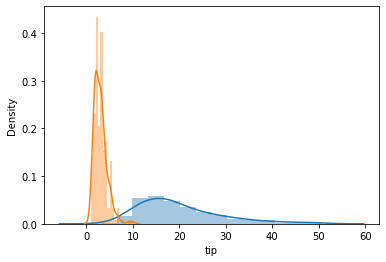

In [39]:
sns.distplot(df['total_bill'])
sns.distplot(df['tip'])

<AxesSubplot:>

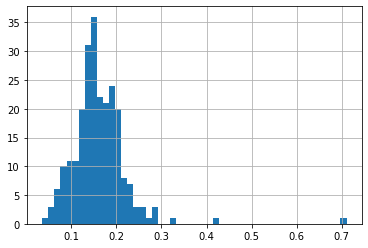

In [40]:
df['tip_pct'] = df['tip']/df['total_bill']
df['tip_pct'].hist(bins=50)

<AxesSubplot:ylabel='Density'>

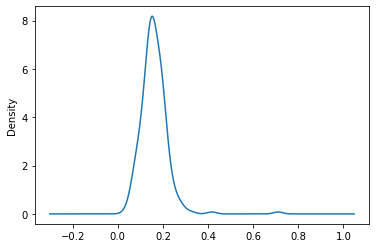

In [41]:
df['tip_pct'].plot(kind='kde')

## 12-10 시계열 데이터 시각화하기

__시계열 데이터 시각화 하기__
___

In [42]:
csv_path = os.getenv("HOME") + "/aiffel/data_represent/data/flights.csv"
data = pd.read_csv(csv_path)
flights = pd.DataFrame(data)
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


<AxesSubplot:xlabel='year', ylabel='passengers'>

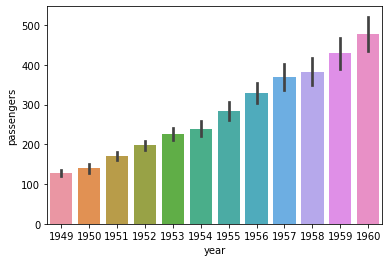

In [43]:
sns.barplot(data=flights, x='year', y='passengers')

<AxesSubplot:xlabel='year', ylabel='passengers'>

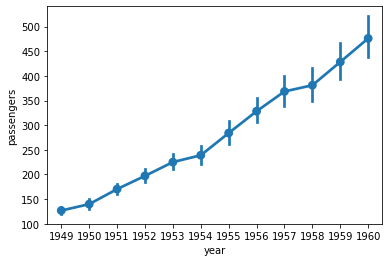

In [44]:
sns.pointplot(data=flights, x='year', y='passengers')

<AxesSubplot:xlabel='year', ylabel='passengers'>

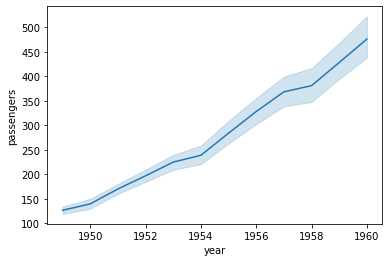

In [46]:
sns.lineplot(data=flights, x='year', y='passengers')

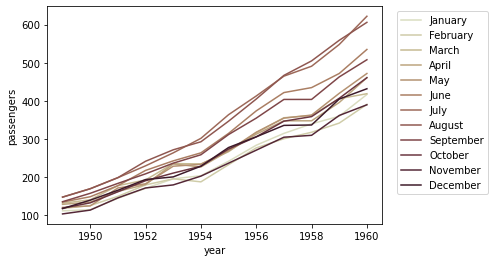

In [47]:
sns.lineplot(data=flights, x='year', y='passengers', hue='month', palette='ch:.50')
plt.legend(bbox_to_anchor=(1.03,1),loc=2) #legend 그래프 밖에 추가하기

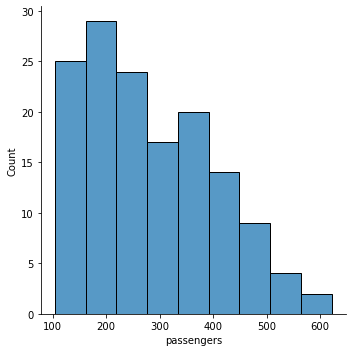

In [48]:
sns.displot(flights['passengers'])

## 12-11 Heatmap

In [49]:
pivot = flights.pivot(index='year', columns='month', values='passengers')
pivot

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237
1954,227,293,229,188,204,302,264,235,234,203,229,259
1955,269,347,278,233,242,364,315,267,270,237,274,312
1956,313,405,306,277,284,413,374,317,318,271,306,355
1957,348,467,336,301,315,465,422,356,355,305,347,404


<AxesSubplot:xlabel='month', ylabel='year'>

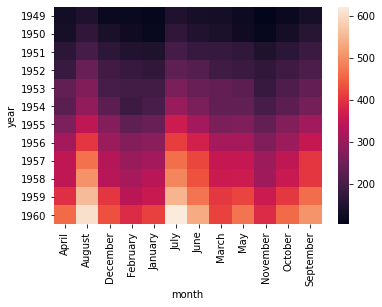

In [50]:
sns.heatmap(pivot)

<AxesSubplot:xlabel='month', ylabel='year'>

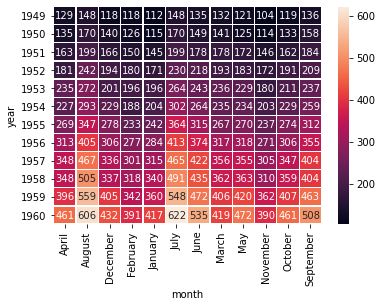

In [51]:
sns.heatmap(pivot, linewidths=.2, annot=True, fmt="d")


<AxesSubplot:xlabel='month', ylabel='year'>

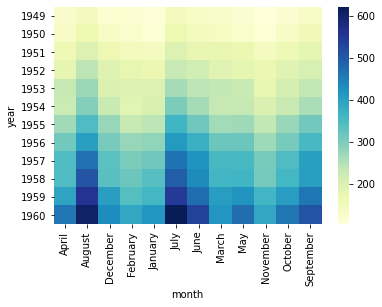

In [54]:
sns.heatmap(pivot, cmap="YlGnBu")